<a href="https://colab.research.google.com/github/chetan7116desai/BasicPython-programming/blob/master/Data_Cleansing/FLU_Datacleaning_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Vaccine Efficiency Prediction using machine learning techniques**





>***Understanding VAERS data***



1.   VAERS was formed by the FDA and the CDC to gather reports of vaccine-related adverse events. (From November 1, 1990 to the present)
2.   VAERS is used to continuously monitor reports to see if any vaccination or vaccine lot has a greater rate of incidents than expected
3. Approximately 85-90 percent of vaccination adverse event reports are for very modest occurrences like fevers or redness and edema at the injection site. The remaining reports (less than 15%) are about serious incidents including hospitalizations, life-threatening diseases, or fatalities
4. When multiple reports of a silgle case or event are received, only the first report received is included in the publicly acessible dataset

---







> ***Description of Data Files***


Data sets files can be downloaded from [here](https://vaers.hhs.gov/data/datasets.html)

Data Discription can be found [here](https://vaers.hhs.gov/docs/VAERSDataUseGuide_November2020.pdf)

> ***There are three data files:***

VAERSDATA.CSV

VAERSVAX.CSV

VAERSSYMPTOMS.CSV

There are three data types:

NUM = numeric data

CHAR = text or "character" data

DATE = date fields in mm/dd/yy format





> ***VAERS Data Limitations***



When analyzing VAERS data, keep in mind that no cause-and-effect relationship has been proven for any reported occurrence. VAERS receives reports of all possible links between vaccines and adverse events (possible side effects). As a result, VAERS collects information on any adverse event that occurs after immunization, whether it is coincidental or actually caused by the vaccine. A report of an adverse event to VAERS is not proof that the occurrence was caused by the vaccine.

* VAERS is a passive reporting system, which means that reports of adverse events are not collected automatically and must be reported to VAERS. Anyone, including healthcare providers, patients, and family members, can voluntarily submit VAERS reports. The quality and completeness of reports varies. They frequently lack details and, on sometimes, may provide inaccurate information.

* One of the major drawbacks of passive monitoring systems, such as VAERS, is "underreporting." The phrase "underreporting" refers to the reality that only a tiny percentage of genuine adverse events are reported to VAERS. The extent of underreporting differs greatly. For example, many of the millions of immunizations given by injection each year induce pain, yet only a small percentage of these instances result in a VAERS report. Minor side effects of vaccines often include this type of soreness, as well as low fevers, as physicians and patients are aware. Serious and unexpected medical events, on the other hand, are more likely to be reported than minor ones, especially when they occur soon after immunization, even if they are unrelated to the vaccine.

* A report to VAERS does not always imply that the indicated vaccine(s) were to blame for the adverse event. It merely validates that the alleged occurrence happened after the vaccine was administered. VAERS will accept the report without requiring confirmation that the occurrence was caused by the immunization. VAERS accepts all reports without determining if the vaccine was to blame.

In [ ]:
# Connecting to shared drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings(action='ignore')
import re
import numpy as np

## Data Process

### Understaing VAERS Vaccination data

In [ ]:
df_vax = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_vax.csv")

In [ ]:
df_vax.drop('Unnamed: 0',axis=1,inplace=True)
df_vax.head()


,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,27274,HIBV,PFIZER\WYETH,M030FC,1,IM,NaN,HIB (HIBTITER)
1,27275,FLU3,PARKE-DAVIS,01870P,UNK,IM,LA,INFLUENZA (SEASONAL) (FLUOGEN)
2,27276,DTP,LEDERLE LABORATORIES,0B21173,3,IM L,NaN,DTP (TRI-IMMUNOL)
3,27276,OPV,PFIZER\WYETH,NaN,3,PO,MO,"POLIO VIRUS, ORAL (ORIMUNE)"
4,27277,RAB,PASTEUR MERIEUX INST.,D1186,2,NaN,LA,RABIES (IMOVAX ID)


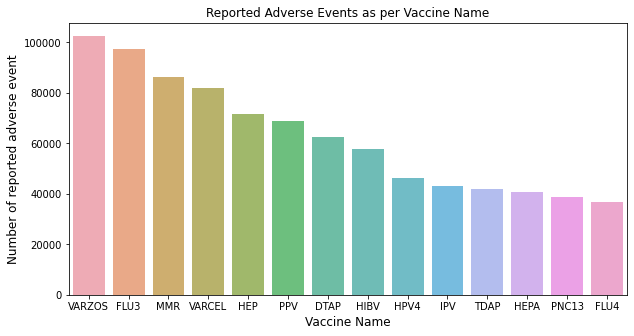

In [ ]:
vax_type  = df_vax['VAX_TYPE'].value_counts().sort_values(ascending=False)[1:15]
vax_type = pd.DataFrame(vax_type)
plt.figure(figsize=(10,5))
sns.barplot(x=vax_type.index, y=vax_type.VAX_TYPE, data=vax_type, alpha=0.8)
plt.title('Reported Adverse Events as per Vaccine Name')
plt.ylabel('Number of reported adverse event', fontsize=12)
plt.xlabel('Vaccine Name', fontsize=12)
plt.show()

In [ ]:
df_vax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420759 entries, 0 to 2420758
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   VAERS_ID         int64 
 1   VAX_TYPE         object
 2   VAX_MANU         object
 3   VAX_LOT          object
 4   VAX_DOSE_SERIES  object
 5   VAX_ROUTE        object
 6   VAX_SITE         object
 7   VAX_NAME         object
dtypes: int64(1), object(7)
memory usage: 147.8+ MB


### Understaing VAERS Symptoms data

In [ ]:
df_symp = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_sym.csv")

In [ ]:
df_symp.drop('Unnamed: 0',axis=1,inplace=True)
df_symp.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,25001,Agitation,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25003,Delirium,8.1,Hypokinesia,8.1,Hypotonia,8.1,NaN,NaN,NaN,NaN
2,25004,Chills,8.1,Dermatitis contact,8.1,Oedema genital,8.1,Pelvic pain,8.1,NaN,NaN
3,25005,Arthritis,8.1,Injection site oedema,8.1,Injection site reaction,8.1,NaN,NaN,NaN,NaN
4,25006,Convulsion,8.1,Dizziness,8.1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_symp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596826 entries, 0 to 2596825
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   VAERS_ID         int64  
 1   SYMPTOM1         object 
 2   SYMPTOMVERSION1  float64
 3   SYMPTOM2         object 
 4   SYMPTOMVERSION2  float64
 5   SYMPTOM3         object 
 6   SYMPTOMVERSION3  float64
 7   SYMPTOM4         object 
 8   SYMPTOMVERSION4  float64
 9   SYMPTOM5         object 
 10  SYMPTOMVERSION5  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 217.9+ MB


### Understaing VAERS patient info data

In [ ]:
df_data = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_pat.csv")

In [ ]:
df_data.drop('Unnamed: 0',axis=1,inplace=True)
df_data.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,27274,01/02/1991,CA,1.5,NaN,NaN,F,NaN,Pt vaccinated with HIB titer developed meningi...,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,Y,11/28/1990,11/28/1990,0.0,CSF & blood culture positive for HIB,UNK,UNK,NaN,Had URI at time of injection,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1,27275,01/02/1991,MN,82.0,82.0,NaN,M,12/26/1990,Pt vaccinated with FLUOGEN apparent cardiac ar...,Y,11/26/1990,NaN,NaN,NaN,NaN,NaN,NaN,N,11/26/1990,11/26/1990,0.0,NaN,OTH,OTH,"Ascriptin, Metamucil",NaN,"No allergies, murmur, parkinson's dsiease, art...",~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN
2,27276,01/02/1991,GA,0.6,0.0,0.6,F,12/14/1990,Pt vaccinated with DTP/OPV developed fever 105...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,U,12/11/1990,12/11/1990,0.0,CBC normal,PVT,PVT,NaN,mild otitis media,otitis media,~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN
3,27277,01/02/1991,NY,37.0,37.0,NaN,F,12/05/1990,"Pt vacc. w/ Rabies developed backache, very pa...",NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,N,11/13/1990,11/14/1990,1.0,CBC-SMA-23 CPK 19 NOV; CBC- Diff seg rate SMA...,PVT,PVT,NaN,NaN,NaN,~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN
4,27278,01/02/1991,ME,57.0,57.0,NaN,M,12/20/1990,Pt vaccinated with Pneumococcal/FLU ZONE devel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/19/1990,12/20/1990,1.0,NaN,PVT,PVT,"Advil, Theolair",Emphysema no acute,emphysema/Rt shoulder injury/smoker,~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951645 entries, 0 to 1951644
Data columns (total 35 columns):
 #   Column        Dtype  
---  ------        -----  
 0   VAERS_ID      int64  
 1   RECVDATE      object 
 2   STATE         object 
 3   AGE_YRS       float64
 4   CAGE_YR       float64
 5   CAGE_MO       float64
 6   SEX           object 
 7   RPT_DATE      object 
 8   SYMPTOM_TEXT  object 
 9   DIED          object 
 10  DATEDIED      object 
 11  L_THREAT      object 
 12  ER_VISIT      object 
 13  HOSPITAL      object 
 14  HOSPDAYS      float64
 15  X_STAY        object 
 16  DISABLE       object 
 17  RECOVD        object 
 18  VAX_DATE      object 
 19  ONSET_DATE    object 
 20  NUMDAYS       float64
 21  LAB_DATA      object 
 22  V_ADMINBY     object 
 23  V_FUNDBY      object 
 24  OTHER_MEDS    object 
 25  CUR_ILL       object 
 26  HISTORY       object 
 27  PRIOR_VAX     object 
 28  SPLTTYPE      object 
 29  FORM_VERS     int64  
 30  TODAYS_DATE   obje

### Data Exploration 

In [ ]:
print(df_data["VAERS_ID"].nunique())
print(df_symp["VAERS_ID"].nunique())
print(df_vax["VAERS_ID"].nunique())

1951645
1951386
1951644


In [ ]:
print(df_data.shape)
print(df_symp.shape)
print(df_vax.shape)

(1951645, 35)
(2596826, 11)
(2420759, 8)


## Common Functions

In [ ]:
def sanitycheck(df):
    """
    Generates Unique count, Null Count and Null Percentage for each column in Dataframe
    
    Parameters
    ---------
    Input pandas dataframe
    
    Output: pandas dataframe
    """
    data = []
    for col in df.columns:
        data.append({'Column' : col,'Unique' : len(df[col].unique()),
                'Null Count' : df[col].isnull().sum(),
                'Null Percentage' : round(df[col].isnull().sum()/df.shape[0]*100,2) })
    return pd.DataFrame(data).sort_values(['Null Percentage'],ascending=False)

In [ ]:
def binaryconvert(df,cols):
    """
    Converts categorical value with Y and N to binary 0's and 1's    
    Parameters
    ---------
    Input pandas dataframe and column names
    
    Output: pandas dataframe
    """
    for col in cols:
      df[col] = np.where(df[col] == "Y", 1, 0)


## INFLUENZA Vaccine Data Exploration

### INFLUENZA VAERS vaccine data

In [ ]:
# Filtering only INFLUENZA Vaccine info
df_Flu_vax = df_vax[(df_vax['VAX_TYPE'] =='FLU(H1N1)') | (df_vax['VAX_TYPE'] =='FLU3') | (df_vax['VAX_TYPE'] =='FLU4') | 
                     (df_vax['VAX_TYPE'] =='FLUA3') | (df_vax['VAX_TYPE'] =='FLUA4') | (df_vax['VAX_TYPE'] =='FLUC3') |
                     (df_vax['VAX_TYPE'] =='FLUC4') | (df_vax['VAX_TYPE'] =='FLUN(H1N1)') | (df_vax['VAX_TYPE'] =='FLUN3') |
                    (df_vax['VAX_TYPE'] =='FLUN4') | (df_vax['VAX_TYPE'] =='FLUR3') | (df_vax['VAX_TYPE'] =='FLUR4')]
                     
print(df_Flu_vax["VAERS_ID"].nunique())

169699


In [ ]:
df_Flu_vax.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
1,27275,FLU3,PARKE-DAVIS,01870P,UNK,IM,LA,INFLUENZA (SEASONAL) (FLUOGEN)
5,27278,FLU3,CONNAUGHT LABORATORIES,0F11200,UNK,IM,LA,INFLUENZA (SEASONAL) (FLUZONE)
10,27281,FLU3,PARKE-DAVIS,02580P,5,IM,LA,INFLUENZA (SEASONAL) (FLUOGEN)
29,27290,FLU3,CONNAUGHT LABORATORIES,0F11222,UNK,NaN,NaN,INFLUENZA (SEASONAL) (FLUZONE)
30,27291,FLU3,CONNAUGHT LABORATORIES,0F11222,UNK,NaN,LA,INFLUENZA (SEASONAL) (FLUZONE)


In [ ]:
sanitycheck(df_Flu_vax)

,Column,Unique,Null Count,Null Percentage
3,VAX_LOT,27143,26499,15.49
6,VAX_SITE,12,18861,11.03
5,VAX_ROUTE,16,12797,7.48
4,VAX_DOSE_SERIES,9,5090,2.98
0,VAERS_ID,169699,0,0.00
1,VAX_TYPE,12,0,0.00
2,VAX_MANU,15,0,0.00
7,VAX_NAME,41,0,0.00


VAX_SITE,VAX_ROUTE,VAX_LOT has significant null values

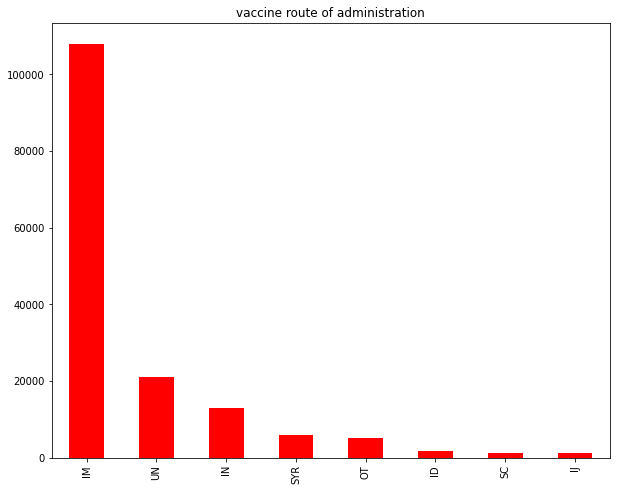

In [ ]:
plt.figure(figsize=(10,8))
route = df_Flu_vax['VAX_ROUTE'].value_counts().sort_values(ascending=False)[:8]
route.plot(kind='bar', title='vaccine route of administration',color="r")

1.   IM : Intramuscular
2.   OT : Other
3.   SYR : Needle and syringe 
4.   UN  : Unknown
5.   SC  : Subcutaneous



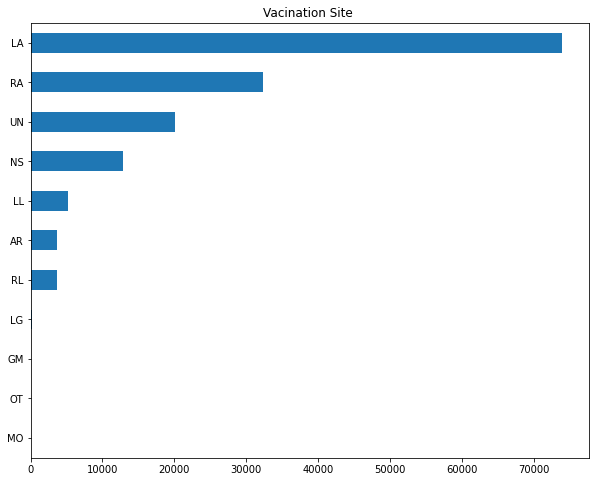

In [ ]:
plt.figure(figsize=(10,8))
site = df_Flu_vax['VAX_SITE'].value_counts().sort_values(ascending=True)[-20:]
site.plot(kind='barh', title='Vacination Site ')

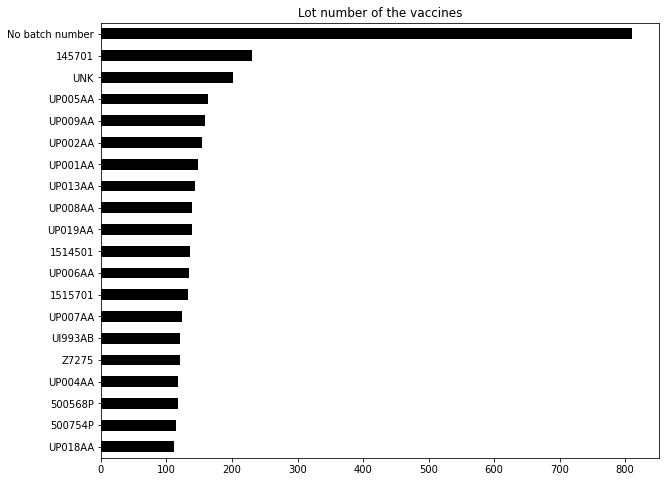

In [ ]:
plt.figure(figsize=(10,8))
lot = df_Flu_vax['VAX_LOT'].value_counts().sort_values(ascending=True)[-20:]
lot.plot(kind='barh', title='Lot number of the vaccines',color="black")

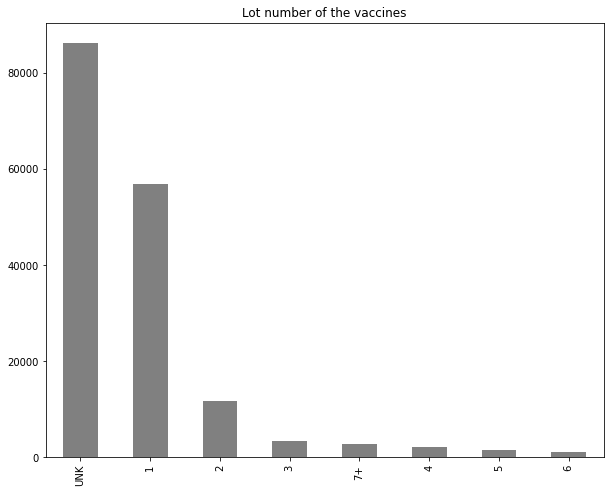

In [ ]:
plt.figure(figsize=(10,8))
lot = df_Flu_vax['VAX_DOSE_SERIES'].value_counts().sort_values(ascending=False)[-20:]
lot.plot(kind='bar', title='Lot number of the vaccines',color="grey")

After Observing all the graphs above there is no signifiant information which can be used for our analysis so we will be dropping the column

In [ ]:
df_Flu_vax = df_Flu_vax.drop(columns =['VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE'])
df_Flu_vax.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_NAME
1,27275,FLU3,PARKE-DAVIS,INFLUENZA (SEASONAL) (FLUOGEN)
5,27278,FLU3,CONNAUGHT LABORATORIES,INFLUENZA (SEASONAL) (FLUZONE)
10,27281,FLU3,PARKE-DAVIS,INFLUENZA (SEASONAL) (FLUOGEN)
29,27290,FLU3,CONNAUGHT LABORATORIES,INFLUENZA (SEASONAL) (FLUZONE)
30,27291,FLU3,CONNAUGHT LABORATORIES,INFLUENZA (SEASONAL) (FLUZONE)


In [ ]:
df_Flu_vax.drop_duplicates( keep="first", inplace=True)
df_Flu_vax.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170971 entries, 1 to 2419449
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   VAERS_ID  170971 non-null  int64 
 1   VAX_TYPE  170971 non-null  object
 2   VAX_MANU  170971 non-null  object
 3   VAX_NAME  170971 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.5+ MB


In [ ]:
vax_count  = df_Flu_vax['VAX_MANU'].value_counts()
vax_count = pd.DataFrame(vax_count)
vax_count['percent'] = round((vax_count['VAX_MANU'] / vax_count['VAX_MANU'].sum()) * 100,2)
vax_count

,VAX_MANU,percent
SANOFI PASTEUR,72247,42.26
GLAXOSMITHKLINE BIOLOGICALS,25354,14.83
NOVARTIS VACCINES AND DIAGNOSTICS,23234,13.59
"MEDIMMUNE VACCINES, INC.",13670,8.00
"SEQIRUS, INC.",11253,6.58
CSL LIMITED,8111,4.74
PFIZER\WYETH,4449,2.60
CONNAUGHT LABORATORIES,4286,2.51
PROTEIN SCIENCES CORPORATION,2536,1.48
EVANS VACCINES,2215,1.30


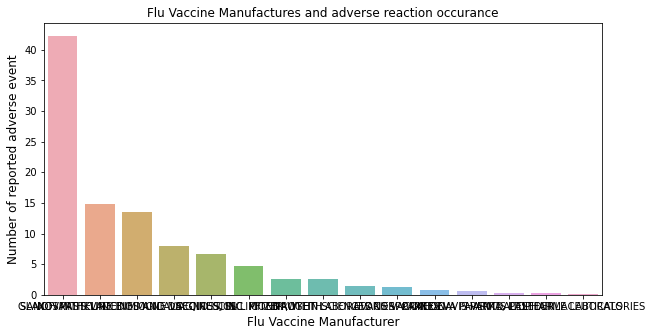

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=vax_count.index, y=vax_count.percent, data=vax_count, alpha=0.8)
plt.title('Flu Vaccine Manufactures and adverse reaction occurance')
plt.ylabel('Number of reported adverse event', fontsize=12)
plt.xlabel('Flu Vaccine Manufacturer', fontsize=12)
plt.show()

In [ ]:
g_index = df_Flu_vax['VAX_MANU'].value_counts().index
g_value = df_Flu_vax['VAX_MANU'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=g_index,values=g_value,textinfo = 'label + percent')])
fig.show()

In [ ]:
Flu_vaersid = df_Flu_vax.VAERS_ID.unique().tolist()

### Flu VAERS Patient data  

In [ ]:
# Merging Vaccine and Patient data
df_Flu = df_data.merge(df_Flu_vax, on="VAERS_ID",how='right')
df_Flu.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_NAME
0,27275,01/02/1991,MN,82.0,82.0,NaN,M,12/26/1990,Pt vaccinated with FLUOGEN apparent cardiac ar...,Y,11/26/1990,NaN,NaN,NaN,NaN,NaN,NaN,N,11/26/1990,11/26/1990,0.0,NaN,OTH,OTH,"Ascriptin, Metamucil",NaN,"No allergies, murmur, parkinson's dsiease, art...",~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN,FLU3,PARKE-DAVIS,INFLUENZA (SEASONAL) (FLUOGEN)
1,27278,01/02/1991,ME,57.0,57.0,NaN,M,12/20/1990,Pt vaccinated with Pneumococcal/FLU ZONE devel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/19/1990,12/20/1990,1.0,NaN,PVT,PVT,"Advil, Theolair",Emphysema no acute,emphysema/Rt shoulder injury/smoker,~ ()~~~In patient,NaN,1,NaN,NaN,NaN,NaN,NaN,FLU3,CONNAUGHT LABORATORIES,INFLUENZA (SEASONAL) (FLUZONE)
2,27281,01/02/1991,FL,19.0,19.0,NaN,F,12/12/1990,Pt vaccinated with FLUOGEN passed out at schoo...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,11/29/1990,12/04/1990,5.0,EEG - 24 hrs halter monitor,PUB,PUB,Lanoxin,NaN,past hx of PVC; pulmonary hypertension Down's ...,~ ()~~~In patient,FL9003,1,NaN,NaN,NaN,NaN,NaN,FLU3,PARKE-DAVIS,INFLUENZA (SEASONAL) (FLUOGEN)
3,27290,01/04/1991,OH,71.0,71.0,NaN,F,12/05/1990,Pt vaccinated with FLU experienced vomiting (f...,NaN,NaN,NaN,NaN,Y,4.0,NaN,NaN,Y,10/30/1990,11/15/1990,16.0,kidney infection,PUB,PUB,Capoten,NaN,NaN,In pt; aching; 70yrold; Flu vax;~ ()~~~In patient,OH9055,1,NaN,NaN,NaN,NaN,NaN,FLU3,CONNAUGHT LABORATORIES,INFLUENZA (SEASONAL) (FLUZONE)
4,27291,01/04/1991,OH,68.0,68.0,NaN,M,11/17/1990,Pt vaccinated w/FLU developed sore throat & st...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,11/01/1990,11/01/1990,0.0,NaN,PUB,PVT,"BP, diuretics, K+, & heart med",developed stiff neck at clinic.,"Increased BP, Heart trouble, asthmatic Bronchi...",~ ()~~~In patient,OH9056,1,NaN,NaN,NaN,NaN,NaN,FLU3,CONNAUGHT LABORATORIES,INFLUENZA (SEASONAL) (FLUZONE)


In [ ]:
df_Flu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170971 entries, 0 to 170970
Data columns (total 38 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      170971 non-null  int64  
 1   RECVDATE      170971 non-null  object 
 2   STATE         156596 non-null  object 
 3   AGE_YRS       156823 non-null  float64
 4   CAGE_YR       146404 non-null  float64
 5   CAGE_MO       10034 non-null   float64
 6   SEX           170971 non-null  object 
 7   RPT_DATE      120936 non-null  object 
 8   SYMPTOM_TEXT  170938 non-null  object 
 9   DIED          1355 non-null    object 
 10  DATEDIED      1008 non-null    object 
 11  L_THREAT      2925 non-null    object 
 12  ER_VISIT      38192 non-null   object 
 13  HOSPITAL      11291 non-null   object 
 14  HOSPDAYS      7707 non-null    float64
 15  X_STAY        803 non-null     object 
 16  DISABLE       3133 non-null    object 
 17  RECOVD        159959 non-null  object 
 18  VAX_

In [ ]:
print(df_Flu["VAERS_ID"].nunique())

169699


In [ ]:
df_Flu[df_Flu.duplicated(['VAERS_ID'])]

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_NAME
12751,192009,10/28/2002,VA,42.00,42.0,NaN,F,10/18/2002,Left arm red/swollen evening of 10/16/02. By n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/16/2002,10/16/2002,0.0,"Basic metabolic panel, CPK, Sediate",PVT,UNK,NaN,None,"Hypertension, Eczema, Inactive asthma",NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,FLU3,SANOFI PASTEUR,INFLUENZA (SEASONAL) (FLUZONE)
15575,214237,12/22/2003,CO,45.00,45.0,NaN,M,12/19/2003,Low-frequency tinnitus-like the rambling of a ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,10/14/2002,NaN,NaN,More comments: most noticeable in quiet room o...,PUB,OTH,NONE,NONE,NONE,sore arm~Hep B (no brand name)~3~40.00~In Patient,NaN,1,NaN,NaN,NaN,NaN,NaN,FLU3,SANOFI PASTEUR,INFLUENZA (SEASONAL) (FLUZONE)
19237,219139,04/16/2004,TX,31.00,24.0,NaN,M,04/16/2004,PT HAD ARM INFLAMMATORY CELLULITIS WITH PAIN A...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,01/27/2004,01/28/2004,1.0,NaN,PUB,PVT,"DEMEROL, PHENERGAN, MORPHINE",PANCREATITIS,PANCREATITS,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,FLU3,SANOFI PASTEUR,INFLUENZA (SEASONAL) (FLUZONE)
20652,230699,12/10/2004,NaN,0.71,0.0,0.7,M,10/08/2004,A report was received from a health care profe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,12/02/2003,12/02/2003,0.0,NaN,UNK,UNK,NONE,NaN,NONE,NaN,PJP200301246,1,NaN,NaN,NaN,NaN,NaN,FLU3,SANOFI PASTEUR,INFLUENZA (SEASONAL) (FLUZONE)
35226,360267,10/09/2009,GA,4.00,4.0,NaN,M,10/09/2009,None reported by mother on 10/9/2009 at 2:30 PM.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,10/08/2009,NaN,NaN,None,OTH,PVT,NaN,None,None,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,FLUN3,"MEDIMMUNE VACCINES, INC.",INFLUENZA (SEASONAL) (FLUMIST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165943,626160,03/08/2016,FR,25.00,25.0,NaN,F,03/07/2016,This case was reported by a physician via a re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,N,11/09/2009,NaN,NaN,"01/20/2016, HLA marker study, HLA DQ6-test: Po...",OTH,OTH,No other medications,Unknown,NaN,NaN,NO2016028755,1,NaN,NaN,NaN,NaN,NaN,FLU3,GLAXOSMITHKLINE BIOLOGICALS,INFLUENZA (SEASONAL) (FLUARIX)
167127,705817,07/27/2017,FR,21.00,NaN,NaN,F,07/27/2017,This case was reported by a consumer via regul...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,U,01/08/2009,NaN,NaN,My overnight study showed I had a rapid sleep ...,OTH,OTH,CONCERTA XL; Trazodone,Unknown,"Asthma; Back disorder, I have suffered some ba...",NaN,B0852251A,1,NaN,NaN,NaN,NaN,NaN,FLU3,GLAXOSMITHKLINE BIOLOGICALS,INFLUENZA (SEASONAL) (FLUARIX)
167305,726629,11/14/2017,FR,NaN,NaN,NaN,U,11/14/2017,This case was reported in a literature article...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,OTH,OTH,No other medications,Unknown,NaN,NaN,DE2017GSK173890,1,NaN,NaN,NaN,NaN,NaN,FLU3,GLAXOSMITHKLINE BIOLOGICALS,INFLUENZA (SEASONAL) (TIV DRESDEN)
169775,875102,07/06/2020,FR,NaN,NaN,NaN,M,NaN,acute kidney injury; Renal impairment; diabete...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,05/27/2015,07/01/2015,35.0,Test Date: 2018; Test Name: oxygen saturation;...,UNK,NaN,candesartan; gliclazide,NaN,NaN,NaN,AU0095075132006AUS009140,2,07/02/2020,NaN,NaN,NaN,NaN,FLU3,SANOFI PASTEUR,INFLUENZA (SEASONAL) (FLUZONE)


In [ ]:
sanitycheck(df_Flu)

,Column,Unique,Null Count,Null Percentage
31,BIRTH_DEFECT,2,170945,99.98
15,X_STAY,2,170168,99.53
10,DATEDIED,871,169963,99.41
9,DIED,2,169616,99.21
11,L_THREAT,2,168046,98.29
16,DISABLE,2,167838,98.17
33,ER_ED_VISIT,2,165690,96.91
14,HOSPDAYS,117,163264,95.49
5,CAGE_MO,12,160937,94.13
13,HOSPITAL,2,159680,93.40


In [ ]:
g_index = df_Flu['V_ADMINBY'].value_counts().index
g_value = df_Flu['V_ADMINBY'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=g_index,values=g_value,textinfo = 'label + percent')])
fig.show()

In [ ]:
df_Flu.drop(['V_FUNDBY','RECVDATE','RPT_DATE','SYMPTOM_TEXT','CAGE_YR','CAGE_MO','V_ADMINBY','FORM_VERS','ER_ED_VISIT','LAB_DATA','ER_VISIT','TODAYS_DATE','SPLTTYPE','X_STAY','VAX_NAME','PRIOR_VAX','OFC_VISIT','X_STAY'],axis=1,inplace=True)

In [ ]:
df_Flu.head()

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,VAX_TYPE,VAX_MANU
0,27275,MN,82.0,M,Y,11/26/1990,NaN,NaN,NaN,NaN,N,11/26/1990,11/26/1990,0.0,"Ascriptin, Metamucil",NaN,"No allergies, murmur, parkinson's dsiease, art...",NaN,NaN,FLU3,PARKE-DAVIS
1,27278,ME,57.0,M,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/19/1990,12/20/1990,1.0,"Advil, Theolair",Emphysema no acute,emphysema/Rt shoulder injury/smoker,NaN,NaN,FLU3,CONNAUGHT LABORATORIES
2,27281,FL,19.0,F,NaN,NaN,NaN,NaN,NaN,NaN,Y,11/29/1990,12/04/1990,5.0,Lanoxin,NaN,past hx of PVC; pulmonary hypertension Down's ...,NaN,NaN,FLU3,PARKE-DAVIS
3,27290,OH,71.0,F,NaN,NaN,NaN,Y,4.0,NaN,Y,10/30/1990,11/15/1990,16.0,Capoten,NaN,NaN,NaN,NaN,FLU3,CONNAUGHT LABORATORIES
4,27291,OH,68.0,M,NaN,NaN,NaN,NaN,NaN,NaN,Y,11/01/1990,11/01/1990,0.0,"BP, diuretics, K+, & heart med",developed stiff neck at clinic.,"Increased BP, Heart trouble, asthmatic Bronchi...",NaN,NaN,FLU3,CONNAUGHT LABORATORIES


In [ ]:
#Converting the Date Columns to Date Datatype
df_Flu['DATEDIED'] =  pd.to_datetime(df_Flu['DATEDIED'])
df_Flu['VAX_DATE'] =  pd.to_datetime(df_Flu['VAX_DATE'])
df_Flu['ONSET_DATE'] =  pd.to_datetime(df_Flu['ONSET_DATE'])


In [ ]:
# Converting SEX columns to binary
df_Flu['SEX'] = df_Flu['SEX'].replace('U', '2')
df_Flu['SEX'] = df_Flu['SEX'].replace('F', '0')
df_Flu['SEX'] = df_Flu['SEX'].replace('M', '1')

df_Flu['RECOVD'] = df_Flu['RECOVD'].fillna(0)
df_Flu['RECOVD'] = df_Flu['RECOVD'].replace('U', 2)
df_Flu['RECOVD'] = df_Flu['RECOVD'].replace('N', 0)
df_Flu['RECOVD'] = df_Flu['RECOVD'].replace('Y', 1)

df_Flu['HOSPDAYS'] = df_Flu['HOSPDAYS'].fillna(0)
df_Flu.STATE = df_Flu.STATE.str.upper()

In [ ]:
cols =  ['L_THREAT','DIED','HOSPITAL','DISABLE','BIRTH_DEFECT']
binaryconvert(df_Flu,cols)

In [ ]:
df_Flu.head()

,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,VAX_TYPE,VAX_MANU
0,27275,MN,82.0,1,1,1990-11-26,0,0,0.0,0,0,1990-11-26,1990-11-26,0.0,"Ascriptin, Metamucil",NaN,"No allergies, murmur, parkinson's dsiease, art...",0,NaN,FLU3,PARKE-DAVIS
1,27278,ME,57.0,1,0,NaT,0,0,0.0,0,1,1990-12-19,1990-12-20,1.0,"Advil, Theolair",Emphysema no acute,emphysema/Rt shoulder injury/smoker,0,NaN,FLU3,CONNAUGHT LABORATORIES
2,27281,FL,19.0,0,0,NaT,0,0,0.0,0,1,1990-11-29,1990-12-04,5.0,Lanoxin,NaN,past hx of PVC; pulmonary hypertension Down's ...,0,NaN,FLU3,PARKE-DAVIS
3,27290,OH,71.0,0,0,NaT,0,1,4.0,0,1,1990-10-30,1990-11-15,16.0,Capoten,NaN,NaN,0,NaN,FLU3,CONNAUGHT LABORATORIES
4,27291,OH,68.0,1,0,NaT,0,0,0.0,0,1,1990-11-01,1990-11-01,0.0,"BP, diuretics, K+, & heart med",developed stiff neck at clinic.,"Increased BP, Heart trouble, asthmatic Bronchi...",0,NaN,FLU3,CONNAUGHT LABORATORIES


In [ ]:
df_Flu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170971 entries, 0 to 170970
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   VAERS_ID      170971 non-null  int64         
 1   STATE         156596 non-null  object        
 2   AGE_YRS       156823 non-null  float64       
 3   SEX           170971 non-null  object        
 4   DIED          170971 non-null  int64         
 5   DATEDIED      1008 non-null    datetime64[ns]
 6   L_THREAT      170971 non-null  int64         
 7   HOSPITAL      170971 non-null  int64         
 8   HOSPDAYS      170971 non-null  float64       
 9   DISABLE       170971 non-null  int64         
 10  RECOVD        170971 non-null  int64         
 11  VAX_DATE      160113 non-null  datetime64[ns]
 12  ONSET_DATE    150754 non-null  datetime64[ns]
 13  NUMDAYS       148905 non-null  float64       
 14  OTHER_MEDS    99020 non-null   object        
 15  CUR_ILL       114

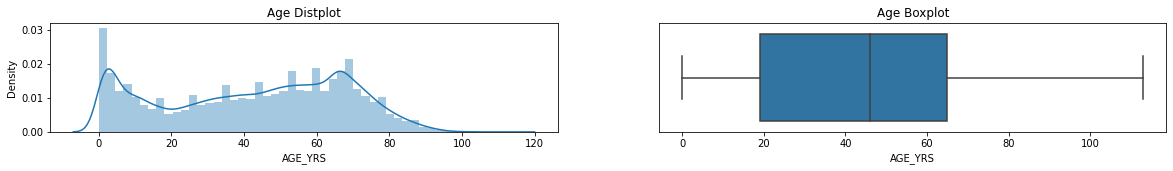

In [ ]:
from scipy.stats import probplot,skew
fig, axes = plt.subplots(1, 2, figsize=(20,2))
sns.distplot(df_Flu['AGE_YRS'],kde=True, ax=axes[0])
sns.boxplot(df_Flu['AGE_YRS'], ax=axes[1])
axes[1].set_yticklabels([])
axes[1].set_yticks([])
axes[0].set_title('Age Distplot')
axes[1].set_title('Age Boxplot')
plt.show()

In [ ]:
df_Flu.to_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/Flu_data.csv')

In [ ]:
df_Flu = pd.read_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/Flu_data.csv')

In [ ]:
df_Flu.head(30)

,Unnamed: 0,VAERS_ID,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,BIRTH_DEFECT,ALLERGIES,VAX_TYPE,VAX_MANU
0,0,27275,MN,82.0,1,1,1990-11-26,0,0,0.0,0,0,1990-11-26,1990-11-26,0.0,"Ascriptin, Metamucil",NaN,"No allergies, murmur, parkinson's dsiease, art...",0,NaN,FLU3,PARKE-DAVIS
1,1,27278,ME,57.0,1,0,NaN,0,0,0.0,0,1,1990-12-19,1990-12-20,1.0,"Advil, Theolair",Emphysema no acute,emphysema/Rt shoulder injury/smoker,0,NaN,FLU3,CONNAUGHT LABORATORIES
2,2,27281,FL,19.0,0,0,NaN,0,0,0.0,0,1,1990-11-29,1990-12-04,5.0,Lanoxin,NaN,past hx of PVC; pulmonary hypertension Down's ...,0,NaN,FLU3,PARKE-DAVIS
3,3,27290,OH,71.0,0,0,NaN,0,1,4.0,0,1,1990-10-30,1990-11-15,16.0,Capoten,NaN,NaN,0,NaN,FLU3,CONNAUGHT LABORATORIES
4,4,27291,OH,68.0,1,0,NaN,0,0,0.0,0,1,1990-11-01,1990-11-01,0.0,"BP, diuretics, K+, & heart med",developed stiff neck at clinic.,"Increased BP, Heart trouble, asthmatic Bronchi...",0,NaN,FLU3,CONNAUGHT LABORATORIES
5,5,27292,OH,79.0,1,0,NaN,0,0,0.0,0,2,1990-11-07,1990-11-09,2.0,Ru-tuss,NaN,allergies to antihistamines,0,NaN,FLU3,CONNAUGHT LABORATORIES
6,6,27301,LA,70.0,0,0,NaN,0,0,0.0,0,0,1990-11-09,1990-11-13,4.0,Procardia,NaN,Increased BP - Polyps of the colon,0,NaN,FLU3,CONNAUGHT LABORATORIES
7,7,27304,FL,82.0,0,0,NaN,0,1,0.0,0,2,1990-10-30,1990-11-09,10.0,"Catapres, Tambocor, Digoxin, ASA, Clonidine",NaN,A CVA & Myasthenia gravis have been ruled out.,0,NaN,FLU3,PARKE-DAVIS
8,8,27315,FL,65.0,1,0,NaN,0,0,0.0,0,1,1990-10-02,1990-10-02,0.0,NaN,NaN,NaN,0,NaN,FLU3,PARKE-DAVIS
9,9,27316,FL,69.0,0,0,NaN,0,0,0.0,0,1,1990-10-02,1990-10-02,0.0,NaN,NaN,NaN,0,NaN,FLU3,PARKE-DAVIS


In [ ]:
# df_Flu['OTHER_MEDS'] = df_Flu['OTHER_MEDS'].replace(np.nan, 0)
# df_Flu['OTHER_MEDS'] = df_Flu['OTHER_MEDS'].replace('none', 0)
# df_Flu['OTHER_MEDS'] = df_Flu['OTHER_MEDS'].replace('unknown', 0)

In [ ]:
# df_Flu.head(10)

In [ ]:
# def tokenize(column):
#     """Tokenizes a Pandas dataframe column and returns a list of tokens.

#     Args:
#         column: Pandas dataframe column (i.e. df['text']).

#     Returns:
#         tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]

#     """

#     tokens = nltk.word_tokenize(column)
#     return [w for w in tokens if w.isalpha()]

In [ ]:
# !pip install nltk
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

In [ ]:
# df_Flu['OTHER_MEDS'] = df_Flu.apply(lambda x: tokenize(x['OTHER_MEDS']), axis=1)
# df_Flu['OTHER_MEDS'].head()

In [ ]:
df_Flu['OTHER_MEDS'] = df_Flu['OTHER_MEDS'].str.lower()
df_Flu = df_Flu[['VAERS_ID','OTHER_MEDS']]
df_Flu.drop_duplicates( keep="first", inplace=True)

In [ ]:
df_Flu.head()

,VAERS_ID,OTHER_MEDS
0,27275,"ascriptin, metamucil"
1,27278,"advil, theolair"
2,27281,lanoxin
3,27290,capoten
4,27291,"bp, diuretics, k+, & heart med"


## Flu VAX Symptoms Cleanup

In [ ]:
df_symp 

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,25001,Agitation,NaN,NaN,NaN,NaN
1,25003,Delirium,Hypokinesia,Hypotonia,NaN,NaN
2,25004,Chills,Dermatitis contact,Oedema genital,Pelvic pain,NaN
3,25005,Arthritis,Injection site oedema,Injection site reaction,NaN,NaN
4,25006,Convulsion,Dizziness,NaN,NaN,NaN
...,...,...,...,...,...,...
2596821,2071536,Fatigue,Herpes zoster,Injection site pain,Pyrexia,SARS-CoV-2 test
2596822,2071537,COVID-19,Fatigue,SARS-CoV-2 test,NaN,NaN
2596823,2071539,Body temperature,Dysphonia,Feeling cold,Muscle spasms,Paraesthesia
2596824,2071539,Pyrexia,Seizure,NaN,NaN,NaN


In [ ]:
df_symp.drop(['SYMPTOMVERSION1','SYMPTOMVERSION2','SYMPTOMVERSION3','SYMPTOMVERSION4','SYMPTOMVERSION5'],axis=1,inplace=True)

KeyError: ignored

In [ ]:
sanitycheck(df_symp)

,Column,Unique,Null Count,Null Percentage
5,SYMPTOM5,9315,1735996,66.85
4,SYMPTOM4,10010,1442418,55.55
3,SYMPTOM3,10759,1042173,40.13
2,SYMPTOM2,11464,521507,20.08
0,VAERS_ID,1951386,0,0.00
1,SYMPTOM1,11856,0,0.00


In [ ]:
df_Flu_sym = df_symp[df_symp.VAERS_ID.isin(Flu_vaersid)]

In [ ]:
df_Flu_sym.VAERS_ID.nunique()

169617

In [ ]:
df_Flu_sym[df_Flu_sym.duplicated(['VAERS_ID'])]

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
1732,26703,Rash,NaN,NaN,NaN,NaN
1833,26803,Pyrexia,Right ventricular failure,NaN,NaN,NaN
1916,26880,Injection site pain,Neck pain,Paraesthesia,Rhinitis,Vomiting
2119,27057,Nausea,Pyrexia,Vomiting,NaN,NaN
2293,27228,Malaise,Palpitations,Paraesthesia,NaN,NaN
...,...,...,...,...,...,...
2587190,2060152,Pyrexia,Syncope,NaN,NaN,NaN
2593963,2067388,Infection,Nasal congestion,Nasopharyngitis,Oropharyngeal pain,SARS-CoV-2 test
2593964,2067388,Throat irritation,NaN,NaN,NaN,NaN
2593972,2067395,SARS-CoV-2 test,NaN,NaN,NaN,NaN


In [ ]:
df_symp.duplicated(subset=['VAERS_ID']).sum ()

645440

In [ ]:
df_symp.loc[df_symp.duplicated(subset=['VAERS_ID']), :]

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
58,25071,Injection site reaction,Nausea,NaN,NaN,NaN
62,25075,Lymphadenopathy,Neck pain,Paraesthesia,NaN,NaN
70,25082,Pyrexia,Visual disturbance,NaN,NaN,NaN
140,25152,Thrombocythaemia,White blood cell disorder,NaN,NaN,NaN
174,25199,Paraesthesia,Paralysis,NaN,NaN,NaN
...,...,...,...,...,...,...
2596808,2071496,Weight decreased,NaN,NaN,NaN,NaN
2596812,2071500,Electrocardiogram,Fibrin D dimer,Pericarditis,Pyrexia,NaN
2596819,2071534,Medication error,Myalgia,Sensory disturbance,Shoulder injury related to vaccine administration,Vaccination site movement impairment
2596820,2071534,Vaccination site pain,Wrong technique in product usage process,NaN,NaN,NaN


In [ ]:
cols = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4','SYMPTOM5']
df_Flu_sym["Symptoms"] = df_Flu_sym[cols].apply(lambda x: ','.join(x.dropna()), axis=1)
#df_symp['Symptoms'] = df_symp['SYMPTOM1'] + "," +  df_symp['SYMPTOM2'] + "," +  df_symp['SYMPTOM3'] + "," +  df_symp['SYMPTOM4'] + "," +  df_symp['SYMPTOM5']
#https://stackoverflow.com/questions/45787782/combine-multiple-columns-in-pandas-excluding-nans

In [ ]:
df_Flu_sym

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,Symptoms
19,25023,Guillain-Barre syndrome,NaN,NaN,NaN,NaN,Guillain-Barre syndrome
21,25025,Pruritus,Rash,NaN,NaN,NaN,"Pruritus,Rash"
26,25030,Encephalitis,Guillain-Barre syndrome,Myalgia,NaN,NaN,"Encephalitis,Guillain-Barre syndrome,Myalgia"
634,25634,Coma,Hypoglycaemia,NaN,NaN,NaN,"Coma,Hypoglycaemia"
749,25751,Rash,NaN,NaN,NaN,NaN,Rash
...,...,...,...,...,...,...,...
2594582,2068346,Bronchitis chronic,Pyrexia,NaN,NaN,NaN,"Bronchitis chronic,Pyrexia"
2594816,2069420,Erythema,Product administered to patient of inappropria...,Throat tightness,NaN,NaN,"Erythema,Product administered to patient of in..."
2594817,2069421,Autoantibody test,Blood thyroid stimulating hormone,Blood thyroid stimulating hormone decreased,Hyperthyroidism,Myalgia,"Autoantibody test,Blood thyroid stimulating ho..."
2594818,2069421,Product administered to patient of inappropria...,Red blood cell sedimentation rate,NaN,NaN,NaN,Product administered to patient of inappropria...


In [ ]:
df_Flu_sym = df_Flu_sym.groupby(['VAERS_ID','Symptoms']).size().reset_index().rename(columns={0:'count'})

In [ ]:
#df_symp.head(30)

df_Flu_all_sym = df_Flu_sym.groupby('VAERS_ID')['Symptoms'].apply(','.join).reset_index()


In [ ]:
df_Flu_all_sym

,VAERS_ID,Symptoms
0,25023,Guillain-Barre syndrome
1,25025,"Pruritus,Rash"
2,25030,"Encephalitis,Guillain-Barre syndrome,Myalgia"
3,25634,"Coma,Hypoglycaemia"
4,25751,Rash
...,...,...
169612,2070070,"Erythema,Injection site erythema,Injection sit..."
169613,2070106,"Syncope,Tremor"
169614,2071457,No adverse event
169615,2071572,"Medication error,No adverse event,Underdose,Wr..."


In [ ]:
df_Flu_sym_id = df_Flu_all_sym.assign(Symptoms=df_Flu_all_sym.Symptoms.str.split(','))

In [ ]:
df_Flu_sym_id

,VAERS_ID,Symptoms
0,25023,[Guillain-Barre syndrome]
1,25025,"[Pruritus, Rash]"
2,25030,"[Encephalitis, Guillain-Barre syndrome, Myalgia]"
3,25634,"[Coma, Hypoglycaemia]"
4,25751,[Rash]
...,...,...
169612,2070070,"[Erythema, Injection site erythema, Injection ..."
169613,2070106,"[Syncope, Tremor]"
169614,2071457,[No adverse event]
169615,2071572,"[Medication error, No adverse event, Underdose..."


In [ ]:
df_Flu_sym1 = df_Flu_sym_id.explode('Symptoms')

In [ ]:
df_Flu_sym1

,VAERS_ID,Symptoms
0,25023,Guillain-Barre syndrome
1,25025,Pruritus
1,25025,Rash
2,25030,Encephalitis
2,25030,Guillain-Barre syndrome
...,...,...
169615,2071572,Wrong product administered
169616,2071573,Medication error
169616,2071573,No adverse event
169616,2071573,Product administered to patient of inappropria...


In [ ]:
df_Flu_all_sym.VAERS_ID.duplicated().sum()

0

In [ ]:
df_Flu_all_sym.nunique()

VAERS_ID    169617
Symptoms     89762
dtype: int64

In [ ]:
df_Flu_all_sym[df_Flu_all_sym.VAERS_ID ==902854]

,VAERS_ID,Symptoms


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
df_Flu_all_sym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169617 entries, 0 to 169616
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   VAERS_ID  169617 non-null  int64 
 1   Symptoms  169617 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.6+ MB


In [ ]:
df_Flu_all_sym[df_Flu_all_sym.VAERS_ID ==902854].Symptoms

Series([], Name: Symptoms, dtype: object)

In [ ]:
wordcloud2 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(df_Flu_all_sym.Symptoms))

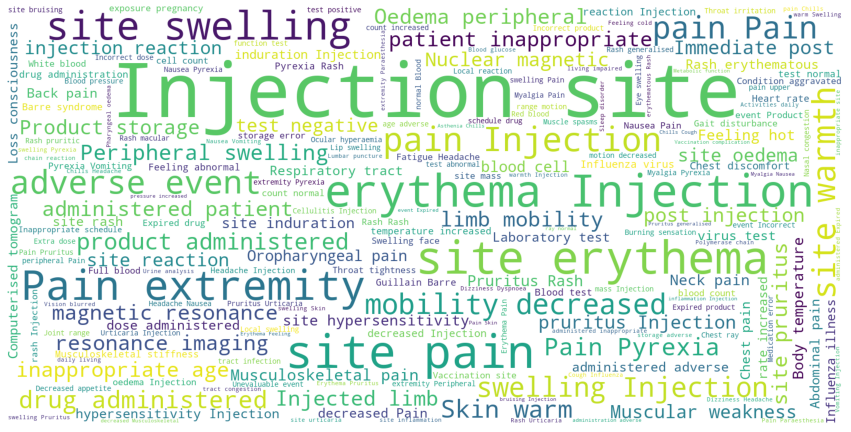

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:
unique_ade = [val.strip() for sublist in df_Flu_all_sym.Symptoms.dropna().str.split(",").tolist() for val in sublist]

In [ ]:
len(unique_ade)

636286

In [ ]:
symptoms_summary = pd.DataFrame(unique_ade,columns=['symptoms']).value_counts(sort=True).reset_index().rename(columns={0:'count'})

In [ ]:
## Drop 15 Flu symptoms
symptoms_summary[0:51]

,symptoms,count
0,Pyrexia,20830
1,Pain,18032
2,Injection site erythema,17539
3,Injection site pain,17413
4,Pain in extremity,14501
5,Headache,13000
6,Erythema,12921
7,Injection site swelling,12689
8,Dizziness,10286
9,Nausea,9713


In [ ]:
symptoms_summary.symptoms[0:25]

0                     Pyrexia
1                        Pain
2     Injection site erythema
3         Injection site pain
4           Pain in extremity
5                    Headache
6                    Erythema
7     Injection site swelling
8                   Dizziness
9                      Nausea
10                   Pruritus
11                     Chills
12                  Urticaria
13                       Rash
14           No adverse event
15      Injection site warmth
16                   Vomiting
17                   Dyspnoea
18                    Fatigue
19                    Myalgia
20                      Cough
21                   Asthenia
22               Paraesthesia
23                    Malaise
24                  Skin warm
Name: symptoms, dtype: object

In [ ]:
top25symp = symptoms_summary.symptoms[0:25]

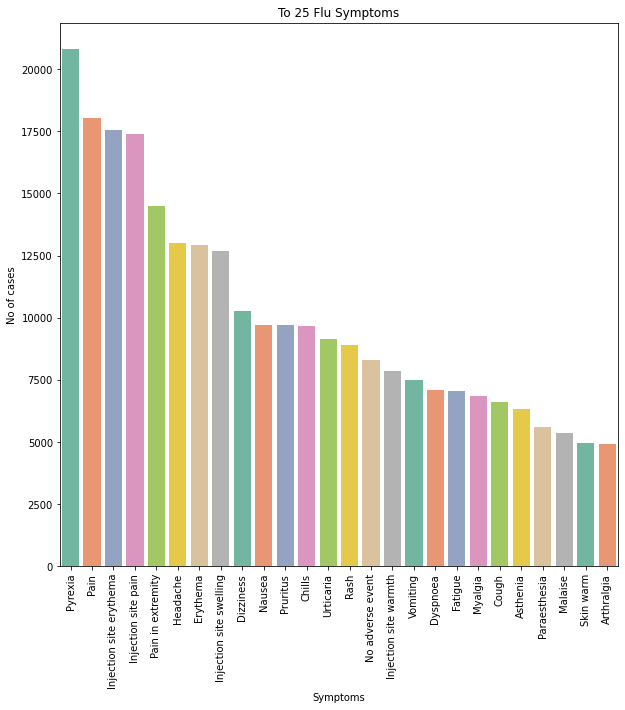

In [ ]:
plt.figure(figsize=(10,10))
chart = sns.barplot(data=symptoms_summary[0:26], x="symptoms", y="count",palette='Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('To 25 Flu Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('No of cases')
plt.show()

Stacked visualization of symptoms from the vaccine manufactures

In [ ]:

stacked_sym_manu = pd.merge(df_Flu_vax,df_Flu_sym1,on='VAERS_ID',how='left')

In [ ]:
stacked_sym_manu['VAX_MANU'].value_counts()

SANOFI PASTEUR                       273086
GLAXOSMITHKLINE BIOLOGICALS          103808
NOVARTIS VACCINES AND DIAGNOSTICS     83776
MEDIMMUNE VACCINES, INC.              44537
SEQIRUS, INC.                         44022
CSL LIMITED                           32876
CONNAUGHT LABORATORIES                16062
PFIZER\WYETH                          15502
PROTEIN SCIENCES CORPORATION           8072
EVANS VACCINES                         6473
PARKE-DAVIS                            4649
MEDEVA PHARMA, LTD.                    4081
AVENTIS PASTEUR                        2247
PARKDALE PHARMACEUTICALS               1764
LEDERLE LABORATORIES                    328
Name: VAX_MANU, dtype: int64

In [ ]:
stacked_sym_manu

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_NAME,Symptoms
0,27275,FLU3,PARKE-DAVIS,INFLUENZA (SEASONAL) (FLUOGEN),Apnoea
1,27275,FLU3,PARKE-DAVIS,INFLUENZA (SEASONAL) (FLUOGEN),Cardiac arrest
2,27278,FLU3,CONNAUGHT LABORATORIES,INFLUENZA (SEASONAL) (FLUZONE),Injection site oedema
3,27278,FLU3,CONNAUGHT LABORATORIES,INFLUENZA (SEASONAL) (FLUZONE),Injection site reaction
4,27278,FLU3,CONNAUGHT LABORATORIES,INFLUENZA (SEASONAL) (FLUZONE),Malaise
...,...,...,...,...,...
641278,2069421,FLUA4,"SEQIRUS, INC.",INFLUENZA (SEASONAL) (FLUAD QUADRIVALENT),Hyperthyroidism
641279,2069421,FLUA4,"SEQIRUS, INC.",INFLUENZA (SEASONAL) (FLUAD QUADRIVALENT),Myalgia
641280,2069421,FLUA4,"SEQIRUS, INC.",INFLUENZA (SEASONAL) (FLUAD QUADRIVALENT),Product administered to patient of inappropria...
641281,2069421,FLUA4,"SEQIRUS, INC.",INFLUENZA (SEASONAL) (FLUAD QUADRIVALENT),Red blood cell sedimentation rate


In [ ]:
dfs = stacked_sym_manu[stacked_sym_manu.Symptoms.isin(top25symp)]

In [ ]:

pd.crosstab(dfs.Symptoms,dfs.VAX_MANU)

VAX_MANU,AVENTIS PASTEUR,CONNAUGHT LABORATORIES,CSL LIMITED,EVANS VACCINES,GLAXOSMITHKLINE BIOLOGICALS,LEDERLE LABORATORIES,"MEDEVA PHARMA, LTD.","MEDIMMUNE VACCINES, INC.",NOVARTIS VACCINES AND DIAGNOSTICS,PARKDALE PHARMACEUTICALS,PARKE-DAVIS,PFIZER\WYETH,PROTEIN SCIENCES CORPORATION,SANOFI PASTEUR,"SEQIRUS, INC."
Symptoms,,,,,,,,,,,,,,,
Asthenia,38,384,303,62,835,6,94,316,797,35,126,245,52,2640,415
Chills,21,348,587,63,1112,6,49,400,1013,33,88,188,90,5009,707
Cough,17,248,277,59,1382,2,52,1105,455,26,123,121,30,2531,261
Dizziness,38,282,595,99,1601,5,51,586,1747,35,61,238,131,4016,860
Dyspnoea,24,277,419,87,1008,6,65,381,933,33,59,197,66,3216,403
Erythema,33,8,541,131,1942,0,9,412,1838,7,0,83,188,7056,729
Fatigue,25,14,390,54,1174,0,4,584,881,7,0,41,101,3161,666
Headache,48,448,749,120,1801,8,73,1347,1579,45,103,299,141,5329,1005
Injection site erythema,102,45,715,352,2917,0,56,315,2077,12,0,239,251,9684,838


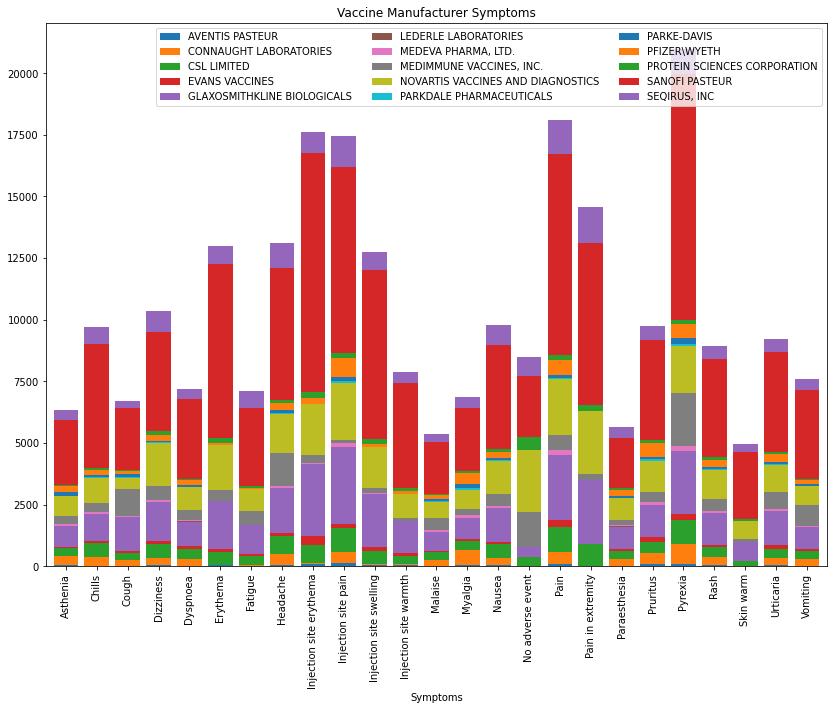

In [ ]:
pd.crosstab(dfs.Symptoms,dfs.VAX_MANU).plot.bar(stacked=True,width = .8,figsize=(14, 10))
plt.legend(['AVENTIS PASTEUR', 'CONNAUGHT LABORATORIES','CSL LIMITED','EVANS VACCINES','GLAXOSMITHKLINE BIOLOGICALS','LEDERLE LABORATORIES',
            'MEDEVA PHARMA, LTD.','MEDIMMUNE VACCINES, INC.','NOVARTIS VACCINES AND DIAGNOSTICS','PARKDALE PHARMACEUTICALS',
            'PARKE-DAVIS','PFIZER\WYETH','PROTEIN SCIENCES CORPORATION','SANOFI PASTEUR','SEQIRUS, INC'], loc='upper right', ncol = 3)
plt.title('Vaccine Manufacturer Symptoms')
plt.show()